In [30]:
import pandas as pd
import yfinance as yf
from fbprophet import Prophet

In [31]:
asml = yf.Ticker("ASML")

In [32]:
hist = asml.history(period="max")
hist = hist.reset_index()

In [33]:
data = pd.DataFrame(data= {'ds': hist['Date'], 'y': hist['Open']})
data

,ds,y
0,1995-03-15,1.197053
1,1995-03-16,1.481354
2,1995-03-17,1.488836
3,1995-03-20,1.421501
4,1995-03-21,1.421501
...,...,...
6479,2020-12-07,464.559998
6480,2020-12-08,465.920013
6481,2020-12-09,463.799988
6482,2020-12-10,451.140015


In [34]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6844,2021-12-07
6845,2021-12-08
6846,2021-12-09
6847,2021-12-10
6848,2021-12-11


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6844,2021-12-07,380.053000,358.247036,403.438008
6845,2021-12-08,379.973118,357.964699,403.514931
6846,2021-12-09,379.907077,360.291081,401.133406
6847,2021-12-10,379.716720,358.118766,402.409835
6848,2021-12-11,380.008746,358.434949,401.698136


/home/max/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/max/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


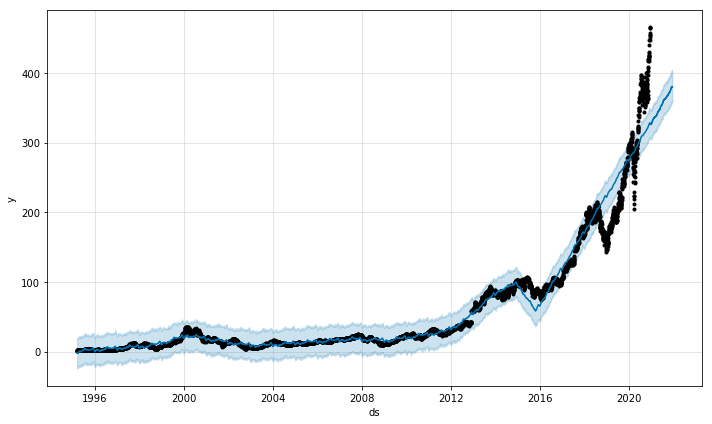

In [37]:
fig1 = m.plot(forecast)

